# DS-SF-34 | 05 | _k_-Nearest Neighbors | Codealong | Starter Code

In [2]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors #, model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-05-iris.csv'))

In [4]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Part A | Activity | Iris Dataset | Exploratory Data Analysis

In [5]:
color = df.Species.map({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'})

In [6]:
#TODO
print df.groupby(['Species']).mean()
print df.groupby(['Species']).median()

            SepalLength  SepalWidth  PetalLength  PetalWidth
Species                                                     
Setosa            5.006       3.418        1.464       0.244
Versicolor        5.936       2.770        4.260       1.326
Virginica         6.588       2.974        5.552       2.026
            SepalLength  SepalWidth  PetalLength  PetalWidth
Species                                                     
Setosa              5.0         3.4         1.50         0.2
Versicolor          5.9         2.8         4.35         1.3
Virginica           6.5         3.0         5.55         2.0


Species
Setosa        Axes(0.125,0.125;0.775x0.775)
Versicolor    Axes(0.125,0.125;0.775x0.775)
Virginica     Axes(0.125,0.125;0.775x0.775)
dtype: object

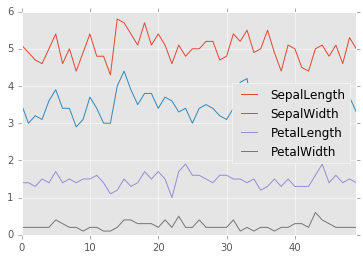

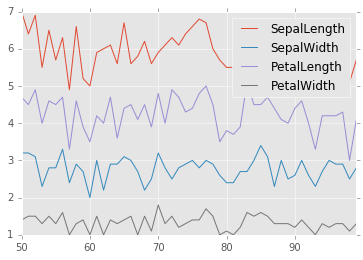

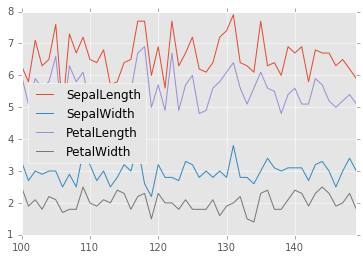

In [7]:
df.groupby(['Species']).plot(figsize=(20,10))
#graphing the data in line graphs doesn't do as much as scatter plots to help determine categories

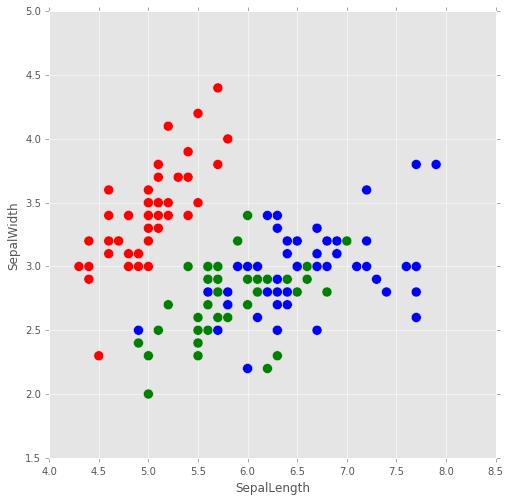

In [8]:
df.plot(kind = 'scatter', x = 'SepalLength', y = 'SepalWidth', s = 100, c = color, figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10eb96bd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fb13050>]], dtype=object)

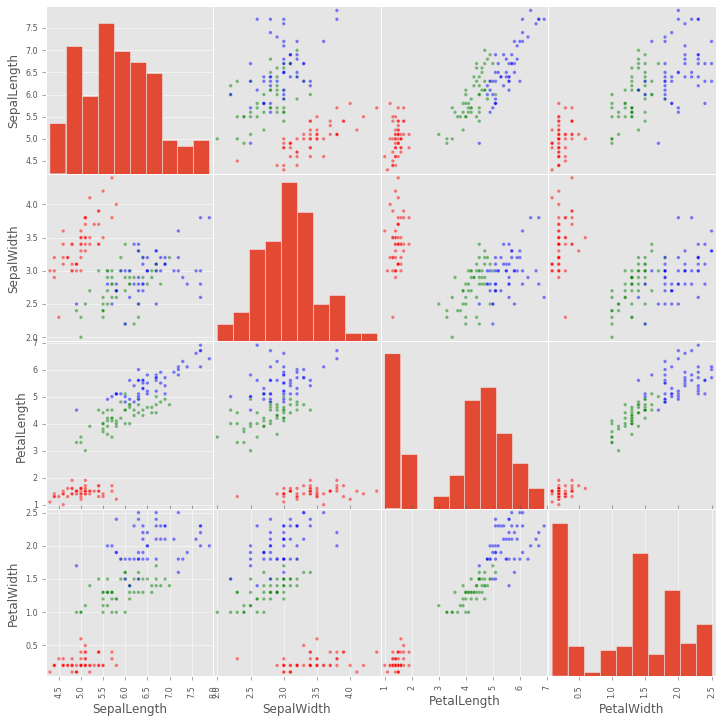

In [9]:
# to get all the possible combinations of scatter plots with histograms included
pd.tools.plotting.scatter_matrix(df[['SepalLength','SepalWidth','PetalLength','PetalWidth']], s=50, c = color, figsize = (12,12))

## Part B | Activity | Hand-Coded Classifier

In [10]:
c = df.Species

In [11]:
def my_first_classifier(row):
    if row.PetalLength <= 2:
        return 'Setosa'
    elif (row.PetalLength  >2) & (row.PetalLength <5):
        return 'Versicolor'
    else:
        return 'Virginica'

In [12]:
c_hat = df.apply(my_first_classifier, axis = 1)

c_hat

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
dtype: object

In [14]:
(c_hat != c).sum()

8

In [15]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

True Class,Setosa,Versicolor,Virginica
Hypothesized Class,,,
Setosa,50,0,0
Versicolor,0,48,6
Virginica,0,2,44


## Part C | Classification Metrics

### Accuracy

In [16]:
# TODO
(c_hat == c).mean()

0.94666666666666666

### Misclassification rate

In [17]:
# TODO
(c_hat != c).mean()

0.053333333333333337

## Part D | _k_-Nearest Neighbors (_k_-NN)

### Feature matrix and response vector

- (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [18]:
#k is a hyper parameter and it determines the number of close points the model will use 
#and it will predict based on the most matched qualities in the k-group

columns_X = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [21]:
# TODO

In [22]:
c = df.Species

In [23]:
c

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

### _k_-Nearest Neighbors

- (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [72]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1).\
    fit(X, c)

You can measure the precision of your prediction with `.score()`

In [73]:
model.score(X, c)

1.0

In [74]:
c_hat = model.predict(X)

In [75]:
(c_hat == c).mean()

1.0

In [76]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

True Class,Setosa,Versicolor,Virginica
Hypothesized Class,,,
Setosa,50,0,0
Versicolor,0,50,0
Virginica,0,0,50


### Train/test sets

- (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html)

50% of the dataset to train the model; the rest to test the model

In [77]:
train_df = df.sample(frac = .5, random_state = 0).sort_index()

In [78]:
train_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
2,4.7,3.2,1.3,0.2,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
10,5.4,3.7,1.5,0.2,Setosa
13,4.3,3.0,1.1,0.1,Setosa
...,...,...,...,...,...
137,6.4,3.1,5.5,1.8,Virginica
141,6.9,3.1,5.1,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
146,6.3,2.5,5.0,1.9,Virginica


In [79]:
test_df = df.drop(train_df.index)

### Feature matrix `train_X` and response vector `train_c`

In [80]:
train_X = train_df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(train_X)
train_X = scaler.transform(train_X)

train_c = train_df.Species

### Feature matrix `test_X` and response vector `test_c`

- (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [ ]:
# TODO

In [ ]:
k_cv = 5 # 5-fold CV
k_nn = range(1, train_df.shape[0] * (k_cv - 1) / k_cv) # k-NN

gs = model_selection.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn, 'weights': ['uniform', 'distance']},
    cv = model_selection.KFold(n_splits = k_cv, shuffle = True, random_state = 0)
)

gs.fit(train_X, train_c)

In [ ]:
gs.cv_results_

In [ ]:
gs.cv_results_.keys()

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

In [ ]:
gs.best_estimator_

In [ ]:
gs.score(train_X, train_c)

In [ ]:
gs.score(test_X, test_c)

## Final model

In [ ]:
# TODO